In [5]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()

In [6]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
dfTeste = df.copy()

q1 = dfTeste['sepal width (cm)'].quantile(0.25)
q3 = dfTeste['sepal width (cm)'].quantile(0.75)
iqr = q3-q1
lLim = q1 - 1.5 * iqr
hLim = q3 + 1.5 * iqr
print(lLim)
print(hLim)

dfTeste.loc[dfTeste['sepal width (cm)'] < lLim, 'sepal width (cm)'] = lLim
dfTeste.loc[dfTeste['sepal width (cm)'] > hLim, 'sepal width (cm)'] = hLim

2.05
4.05


<Axes: >

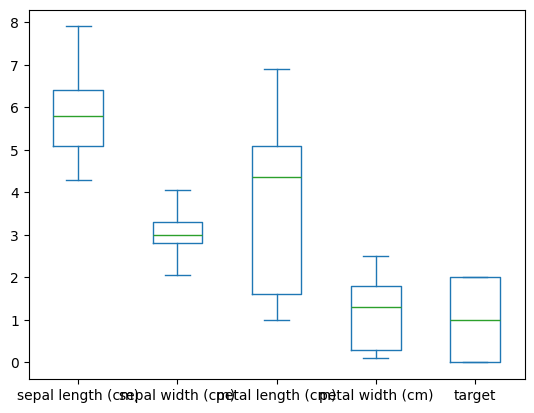

In [9]:
dfTeste.plot(kind = 'box')

In [10]:
data = dfTeste[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
target = dfTeste['target']

In [13]:
# Cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acuracias = []
knn = KNeighborsClassifier(n_neighbors=13)
y_pred = cross_val_predict(knn, data, target, cv=10)
accuracy_score(target, y_pred)
acuracias.append(accuracy_score(target, y_pred))

In [19]:
from sklearn.metrics import classification_report

print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Acurácia: {accuracy_score(target, y_pred)}")
print(f"Precisão: {precision_score(target, y_pred, average='macro')}")
print(f"Recall: {recall_score(target, y_pred, average='macro')}")
print(f"F1: {f1_score(target, y_pred, average='macro')}")

Acurácia: 0.98
Precisão: 0.980125383486728
Recall: 0.98
F1: 0.97999799979998


### make_scorer

In [24]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

my_scoring = {
    "Acurácia": make_scorer(accuracy_score),
    "Precisão": make_scorer(precision_score, average='macro'),
    "Recall": make_scorer(recall_score, average='macro'),
    "F1": make_scorer(f1_score, average='macro') 
}

scores = cross_validate(knn, data, target, cv=5, scoring=my_scoring)

In [25]:
scores

{'fit_time': array([0.00700045, 0.00400114, 0.0020051 , 0.00199533, 0.00099182]),
 'score_time': array([0.02400589, 0.01699543, 0.01099277, 0.00921273, 0.00802422]),
 'test_Acurácia': array([0.93333333, 1.        , 0.96666667, 0.96666667, 1.        ]),
 'test_Precisão': array([0.93333333, 1.        , 0.96969697, 0.96969697, 1.        ]),
 'test_Recall': array([0.93333333, 1.        , 0.96666667, 0.96666667, 1.        ]),
 'test_F1': array([0.93333333, 1.        , 0.96658312, 0.96658312, 1.        ])}